# Visualización del tensor de esfuerzos: Esfera de tracciones

In [1]:
%matplotlib notebook

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
from mayavi import mlab

ModuleNotFoundError: No module named 'mayavi'

In [3]:
def traction_circle(stress, npts=48, ax=None):
    """
    Visualize a second order tensor as a collection of
    tractions vectors over a circle.
    Parameters
    ----------
    stress : ndarray
        Stress tensor.
    npts : int, optional
        Number of vector to plot over the circle.
    ax : Matplotlib axes, optional
        Axes where the plot is going to be added.    
    """
    rad = 1
    theta = np.linspace(0, 2*np.pi, npts, endpoint=False)
    nx = np.cos(theta)
    ny = np.sin(theta)
    vec = np.vstack((nx, ny))
    tracciones = stress.dot(vec)
    plt.figure(figsize=(4, 4))
    ax = plt.gca()
    plt.plot(rad * nx, rad * ny, alpha=0.5, color="black", zorder=4)
    plt.quiver(rad * nx, rad * ny, 
               nx, ny, alpha=0.3, scale=10, zorder=3)
    plt.quiver(rad * nx, rad * ny, 
               tracciones[0, :], tracciones[1, :],
               np.sqrt (tracciones[0, :]**2 + tracciones[1, :]**2),
               scale=30, cmap="Reds", zorder=5)
    plt.axis("image")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    return ax

In [4]:
esfuerzo = np.array([
    [5, 3],
    [3, -2]])

<IPython.core.display.Javascript object>


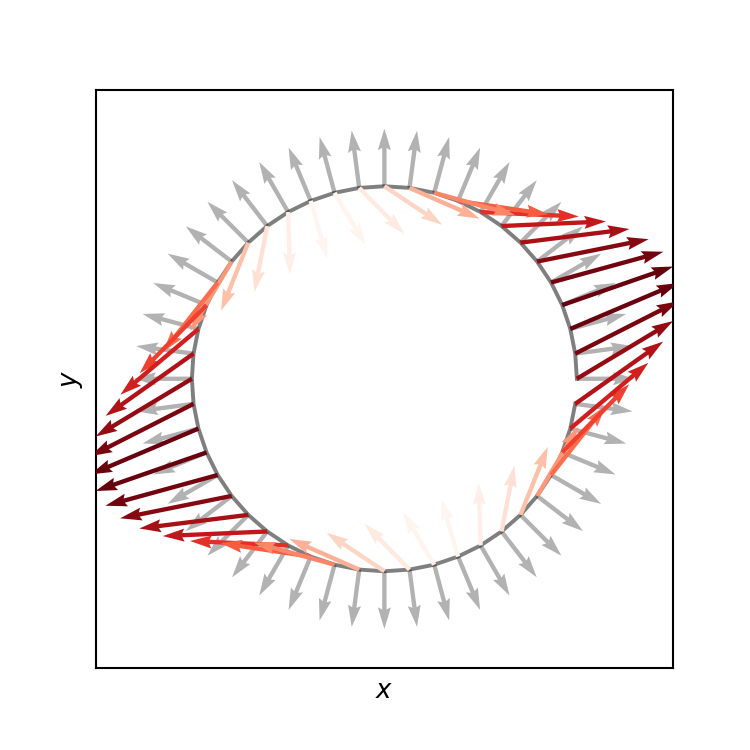

<AxesSubplot:xlabel='$x$', ylabel='$y$'>

In [25]:
traction_circle(esfuerzo)

In [38]:
def traction_sphere(stress):
    """
    Visualize a second order tensor as a collection of
    tractions vectors over a circle.
    Parameters
    ----------
    stress : ndarray
        Stress tensor.
    npts : int, optional
        Number of vector to plot over the circle.
    ax : Matplotlib axes, optional
        Axes where the plot is going to be added.    
    """
    azimuth = np.linspace(0, 2*np.pi, 51)
    zenith = np.linspace(0, np.pi, 51)
    azimuth, zenith = np.meshgrid(azimuth, zenith)
    X = np.sin(zenith) * np.cos(azimuth)
    Y = np.sin(zenith) * np.sin(azimuth)
    Z = np.cos(zenith)

    vec = np.vstack((X.flatten(), Y.flatten(), Z.flatten()))
    tracciones = stress.dot(vec)

    fig = plt.figure(figsize=(4, 4))
    ax = Axes3D(fig)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
    ax.quiver(X, Y, Z, tracciones[0, :], tracciones[1, :], tracciones[2, :])
    return ax

In [39]:
esfuerzo_3d = np.array([
    [5, 0, 0],
    [0, 1, 0],
    [0, 0, 3]])

In [31]:
azimuth = np.linspace(0, 2*np.pi, 51)
zenith = np.linspace(0, np.pi, 51)
azimuth, zenith = np.meshgrid(azimuth, zenith)
X = np.sin(zenith) * np.cos(azimuth)
Y = np.sin(zenith) * np.sin(azimuth)
Z = np.cos(zenith)

In [35]:

vec = np.vstack((X.flatten(), Y.flatten(), Z.flatten()))
tracciones = esfuerzo_3d.dot(vec)


In [37]:
tracciones.shape

(3, 2601)

<IPython.core.display.Javascript object>


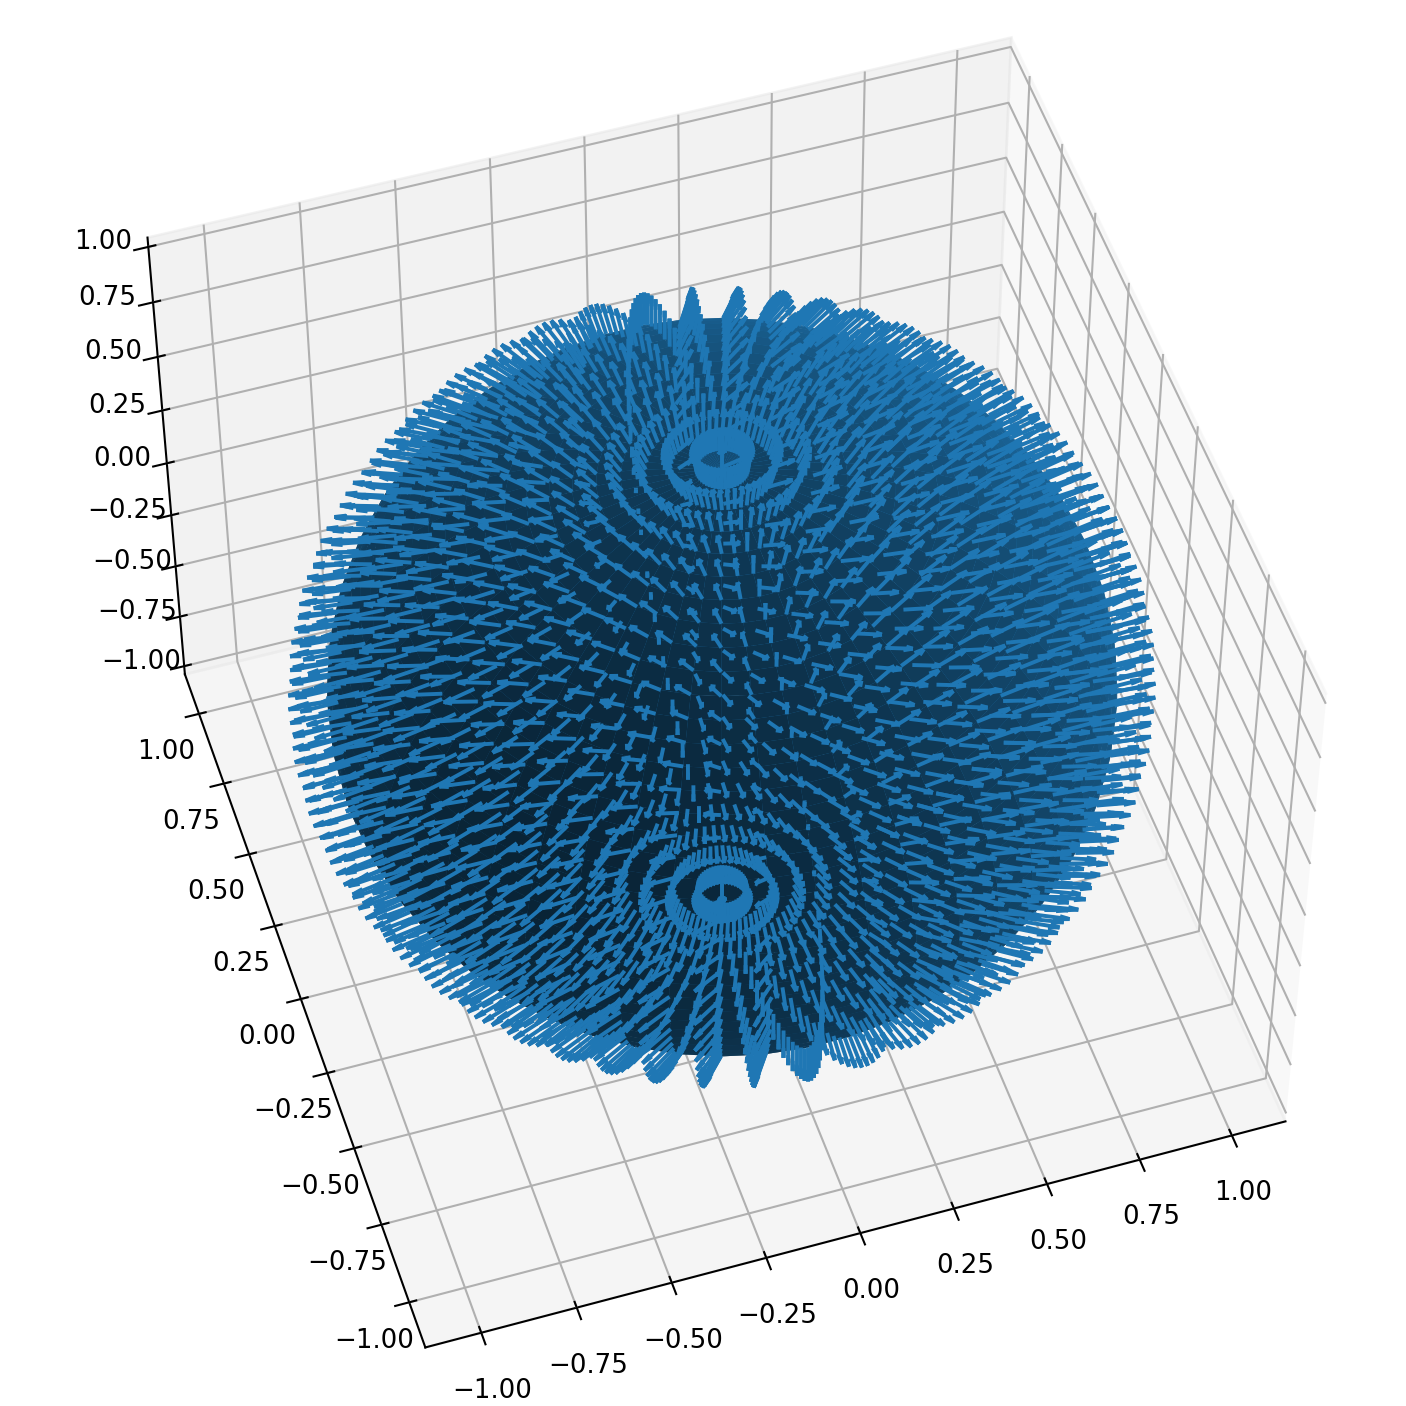

In [43]:

fig = plt.figure(figsize=(4, 4))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
ax.quiver(X.flatten(), Y.flatten(), Z.flatten(),
          tracciones[0, :], tracciones[1, :], tracciones[2, :],
          length=0.1, normalize=True)

In [40]:
traction_sphere(esfuerzo_3d);

<IPython.core.display.Javascript object>

ValueError: shape mismatch: objects cannot be broadcast to a single shape